In [31]:
import pandas as pd
import matplotlib.pylab as plt
import sssdls.api as sm
import numpy as np
import seaborn as sns

# 기초 데이터 읽기

### 이름 변경 내역 파일 읽기

In [146]:
read_path = '../csv/changed_name.csv'
fraud_name = pd.read_csv(read_path)

fraud_name['is_black'] = fraud_name['is_black'].replace('normal', 0)
fraud_name['is_black'] = fraud_name['is_black'].replace('black', 1)

fraud_name.tail()

,is_black,uid,changed_name
4095222,0,9315495,1
4095223,0,9315496,1
4095224,0,9315512,1
4095225,0,9315513,1
4095226,0,9315544,1


### 폰 변경 내역 파일 읽기

In [148]:
read_path = '../csv/changed_phone.csv'
fraud_phone = pd.read_csv(read_path)

fraud_phone['is_black'] = fraud_phone['is_black'].replace('normal', 0)
fraud_phone['is_black'] = fraud_phone['is_black'].replace('black', 1)

fraud_phone.tail()

,is_black,uid,changed_phone
351128,0,9315205,1
351129,0,9315206,1
351130,0,9315557,1
351131,0,9315569,1
351132,0,9315593,1


### 리뷰 받은 사람 파일 읽기

In [165]:
read_path = '../csv/review_ee.csv'
fraud_review_ee = pd.read_csv(read_path)

fraud_review_ee['is_black'] = fraud_review_ee['is_black'].replace('normal', 0)
fraud_review_ee['is_black'] = fraud_review_ee['is_black'].replace('black', 1)

fraud_review_ee = fraud_review_ee.rename(columns={'shop_uid': 'uid'})

fraud_review_ee.tail()

,is_black,uid,review
960295,0,9303612,1
960296,0,9305161,1
960297,0,9310247,1
960298,0,9310368,1
960299,0,9313138,1


### 리뷰 남긴 사람 파일 읽기

In [166]:
read_path = '../csv/review_er.csv'
fraud_review_er = pd.read_csv(read_path)

fraud_review_er['is_black'] = fraud_review_er['is_black'].replace('normal', 0)
fraud_review_er['is_black'] = fraud_review_er['is_black'].replace('black', 1)

fraud_review_er = fraud_review_er.rename(columns={'writer_uid': 'uid'})

fraud_review_er.tail()

,is_black,uid,review
1109973,0,9309329,1
1109974,0,9309339,1
1109975,0,9309423,1
1109976,0,9311843,1
1109977,0,9313932,1


# 데이터 merge

In [172]:
fraud_1 = pd.merge(fraud_name, fraud_phone, on =['is_black', 'uid'], how='outer')

fraud_2 = pd.merge(fraud_1, fraud_review_ee, on =['is_black', 'uid'], how='outer')

fraud = pd.merge(fraud_2, fraud_review_er, on =['is_black', 'uid'], how='outer')

fraud = fraud.rename(columns={'review_x': 'review_ee', 'review_y': 'review_er'})

fraud.fillna(0)

,is_black,uid,changed_name,changed_phone,review_ee,review_er
0,1,0,7.0,0.0,2044.0,18.0
1,1,6,1.0,0.0,0.0,0.0
2,1,1717,1.0,0.0,2.0,2.0
3,1,2645,1.0,0.0,24.0,44.0
4,1,2709,1.0,1.0,0.0,1.0
5,1,3028,1.0,0.0,3.0,3.0
6,1,4299,1.0,0.0,1.0,0.0
7,1,4383,3.0,0.0,13.0,9.0
8,1,5063,2.0,0.0,322.0,86.0
9,1,5933,1.0,2.0,11.0,2.0


In [151]:
y = fraud_name['is_black']
X = fraud_name['changed_name']

logit_mod = sm.Logit(y, X)
# logit_res = logit_mod.fit(disp=0)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.177909
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               is_black   No. Observations:              4095227
Model:                          Logit   Df Residuals:                  4095226
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                 -0.4207
Time:                        17:16:10   Log-Likelihood:            -7.2858e+05
converged:                       True   LL-Null:                   -5.1284e+05
                                        LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
changed_name    -2.7745      0.002  -1195.259      0.000      -2.779      -2.770


In [ ]:
xx = np.linspace(0, 100, 200)


plt.scatter(X, logit_res.predict(X), label=r"$\hat{y}$", marker='x', c=y,
            s=200, lw=2, alpha=0.5)

plt.legend(loc = "best")
plt.show()

In [76]:
logit_res = sm.Logit.from_formula('is_black ~ changed_name', fraud_name).fit()

logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.011182
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_black   No. Observations:              4094682
Model:                          Logit   Df Residuals:                  4094680
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                 0.02962
Time:                        15:28:15   Log-Likelihood:                -45786.
converged:                       True   LL-Null:                       -47184.
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.7715      0.014   -475.639      0.000      -6.799      -6.744
changed_name     0.1657      0.003     61.440      0.000       0.160       0.171
================================================================================
"""

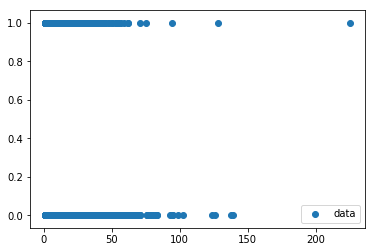

In [101]:
plt.scatter(fraud_name['changed_name'], fraud_name['is_black'], label="data", marker='o')

plt.legend(loc = "best")
plt.show()

In [27]:
np.exp(logis.params)

Intercept       0.001146
changed_name    1.180193
dtype: float64

In [28]:
params = logis.params
conf = logis.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                  2.5%     97.5%        OR
Intercept     0.001114  0.001178  0.001146
changed_name  1.173972  1.186447  1.180193


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [72]:
Y = fraud_name['is_black']
X = fraud_name.drop(['is_black'], axis=1)

# Y.reshape(1, -1)
# X = X.reshape(1, -1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [118]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)  # training 데이터로 학습 시키기
log_clf.score(X_test, Y_test)  # the mean accuracy on the given test data and labels.

/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9984711882481755

In [142]:
#test(valid)/train 을 2:8 로 randomly select
train, valid = train_test_split(fraud_name, test_size=0.2, random_state=0)

#train/valid set 완성
train_y = train['is_black']
train_x = train.drop(['is_black'], axis=1)

valid_y = valid['is_black']
valid_x = valid.drop(['is_black'],axis=1)

In [137]:
# lr = LogisticRegression(C=1000.0, random_state=0)

lr = LogisticRegression()
lr.fit(train_x, train_y)  # Fit the model according to the given training data.
pred_y = lr.predict(valid_x)  # Predict class labels for samples in X.

/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
print("Misclassification samples : %d" %(valid_y != pred_y).sum())

Misclassification samples : 1915


In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print("accuracy: %.3f" %accuracy_score(valid_y, pred_y))  # Accuracy classification score
print("Precision : %.3f" % precision_score(valid_y, pred_y))
print("Recall : %.3f" % recall_score(valid_y, pred_y))
print("F1 : %.3f" % f1_score(valid_y, pred_y))

accuracy: 0.998


/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision : 0.000
Recall : 0.000
F1 : 0.000


/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
fraud_name_10 = fraud_name[fraud_name['changed_name'] <= 10]

In [109]:
y = fraud_name_10['is_black']
X = fraud_name_10['changed_name']

logit_mod = sm.Logit(y, X)
# logit_res = logit_mod.fit(disp=0)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.023258
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_black   No. Observations:              4084758
Model:                          Logit   Df Residuals:                  4084757
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                  -1.114
Time:                        16:14:22   Log-Likelihood:                -95004.
converged:                       True   LL-Null:                       -44933.
                                        LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
changed_name    -5.3635      0.008   -654.274      0.000      -5.380      -5.347

Possibly complete qua

In [110]:
logit_res = sm.Logit.from_formula('is_black ~ changed_name', fraud_name_10).fit()

logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.010553
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_black   No. Observations:              4084758
Model:                          Logit   Df Residuals:                  4084756
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                 0.04062
Time:                        16:15:20   Log-Likelihood:                -43108.
converged:                       True   LL-Null:                       -44933.
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.2815      0.019   -389.763      0.000      -7.318      -7.245
changed_name     0.4246      0.005     78.381      0.000       0.414       0.435
================================================================================
"""